<a href="https://colab.research.google.com/github/evacragnolino/Data-Science-Foundations/blob/main/Eva_C_Unit_3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

In [2]:
!pip install "preliz[full,notebook]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.3 MB/s eta 0:00:00


How many points will it take to win the NCAA Cross Country Championships women's team title?

The NCAA cross country championships is being held on Saturday, November 22nd in Columbia, Misssouri at the Gans Creek cross country course. 32 of the best teams throughout the country race each other. There are seven runners on each team and the top five will score. The place of each runner in the top five excluding individual atheletes who qualified without a team is added up for the team score. The lowest team score wins in cross country.


Data:
I collected data from scores of previous NCAA championships along with the Prenational meets held the same years.

In [22]:
win = pd.read_csv("https://raw.githubusercontent.com/evacragnolino/Data-Science-Foundations/main/Unit%203%20Data%20set%20%20-%20Sheet1.csv")

In [25]:
win['win score']

,win score
0,147
1,123
2,114
3,84
4,96
5,96
6,65
7,90
8,125
9,49


Data:

I collected this data from the ncaa website which has a chart with all the winning scores of all the cross country championships along with result pages of all the prenationals meet.

(array([6., 4., 6., 8., 5., 4., 4., 1., 0., 1.]),
 array([ 45.,  60.,  75.,  90., 105., 120., 135., 150., 165., 180., 195.]),
 <BarContainer object of 10 artists>)

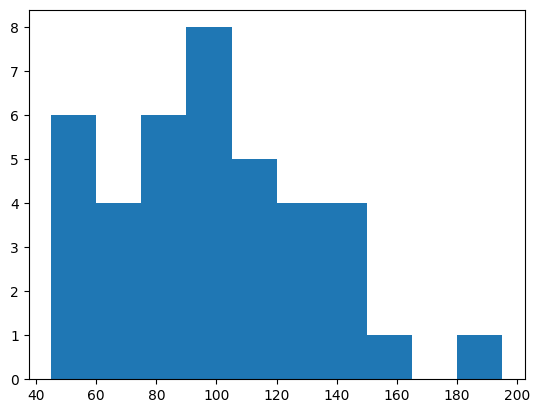

In [27]:
plt.hist(win['win score'])

<Axes: >

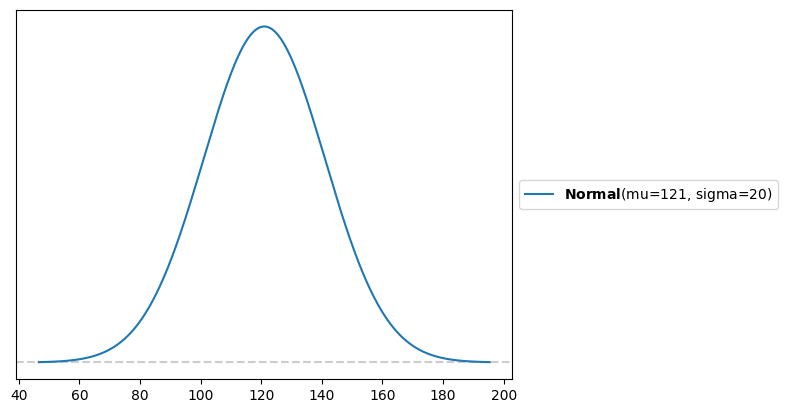

In [32]:
pz.Normal(mu=121, sigma= 20).plot_pdf()

<Axes: >

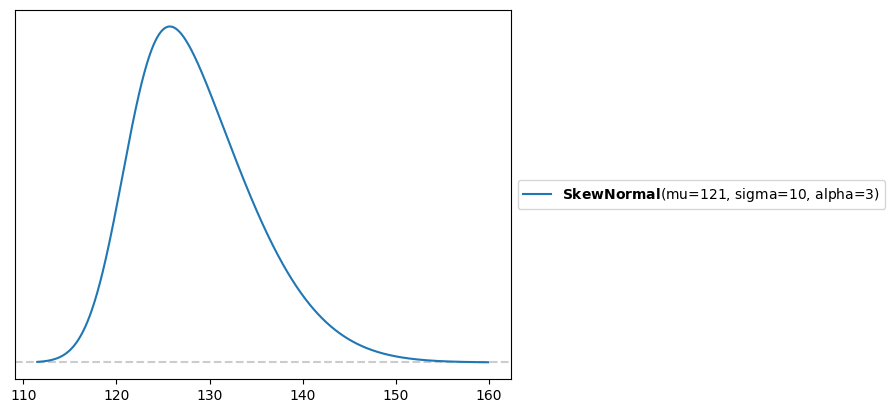

In [36]:
pz.SkewNormal(mu=121, sigma= 10, alpha=3).plot_pdf()

In [65]:
with pm.Model() as model:
    μ = pm.Normal('μ', mu=122, sigma= 20)
    σ = pm.HalfNormal('σ', sigma=121)
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed= win_score['win score'])
    idata_winN = pm.sample()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

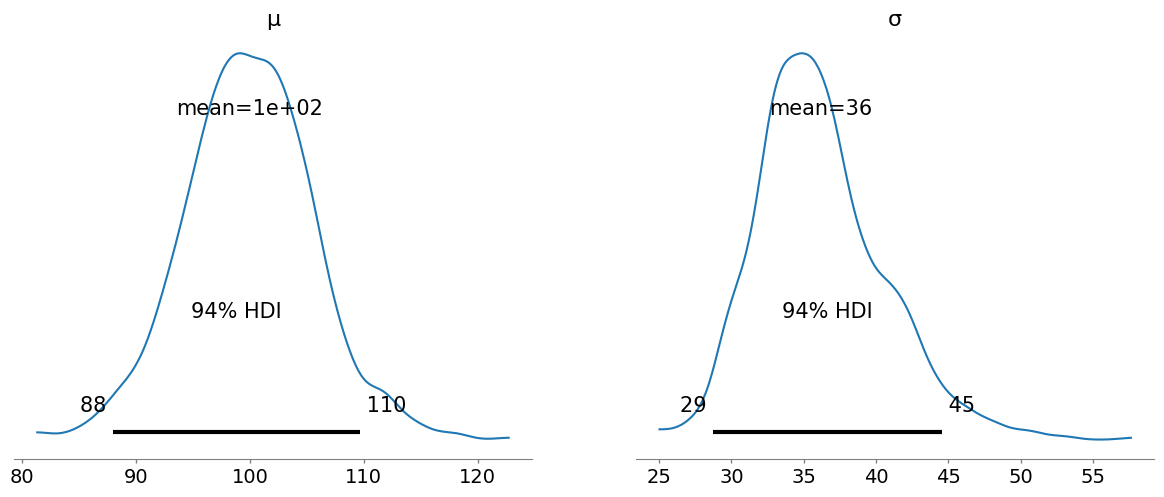

In [66]:
az.plot_posterior(idata_winN)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

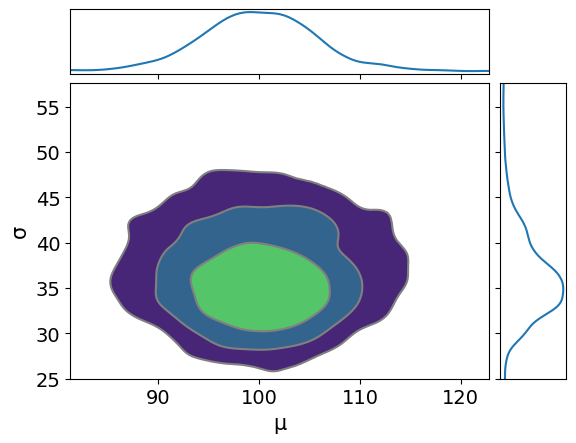

In [67]:
az.plot_pair(idata_winN, kind='kde', marginals=True)

In [68]:
pm.sample_posterior_predictive(idata_winN, model=model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

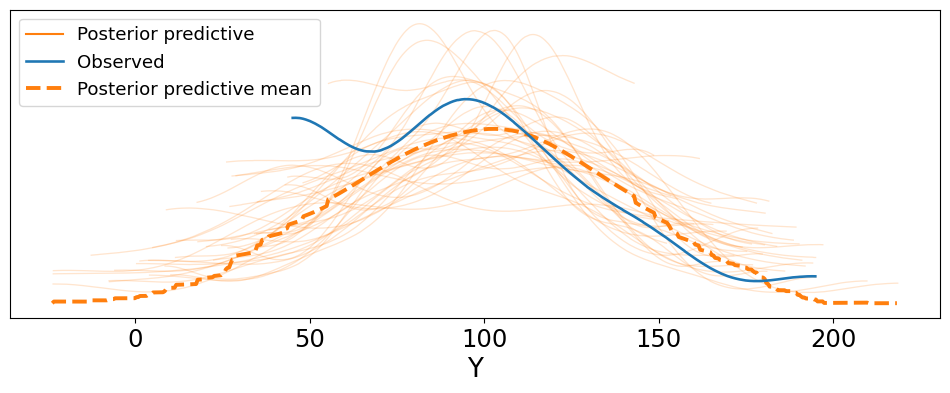

In [69]:
az.plot_ppc(idata_winN, num_pp_samples=38, figsize=(12, 4), colors=["C1", "C0", "C1"])

In [60]:
with pm.Model() as model:

    σ = pm.Normal('σ',  mu=122, sigma= 10)
    Y = pm.HalfNormal('Y', sigma = σ, observed= win_score['win score'])
    idata_winN = pm.sample()

Output()

<Axes: title={'center': 'σ'}>

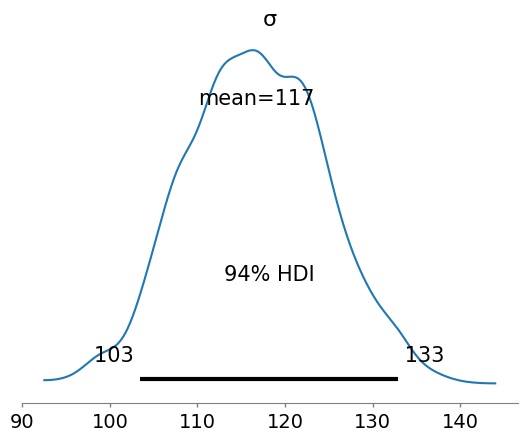

In [61]:
az.plot_posterior(idata_winN)

In [62]:
pm.sample_posterior_predictive(idata_winHN, model=model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

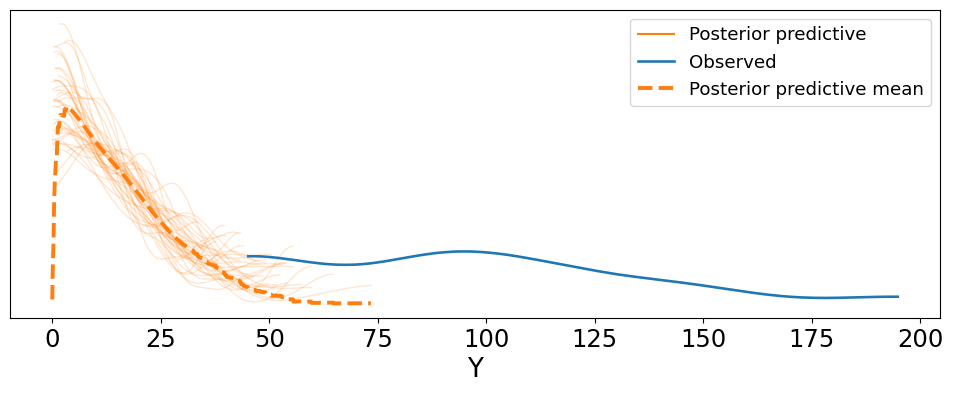

In [63]:
az.plot_ppc(idata_winHN, num_pp_samples=38, figsize=(12, 4), colors=["C1", "C0", "C1"])

Conclusion:
The first model was a lot more accurate than the second. The mean of the second distribution was very far from the observed data. The second model would show that the winning team would score around 20 points which is incredibly unlikely and has never happened before at nationals. The first model is much more accurate. There is a peak at around 100 has a much better chance of happening.